In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("2022-autonomous-mileage-reports-csv.csv")
print(df.columns)


Index(['Manufacturer', 'Permit Number', 'VIN NUMBER',
       'Annual Total of Disengagements', 'DEC 2021', 'JAN 2022', 'FEB 2022',
       'MAR 2022', 'APR 2022', 'MAY 2022', 'JUN 2022', 'JULY 2022', 'AUG 2022',
       'SEP 2022', 'OCT 2022', 'NOV 2022', 'ANNUAL TOTAL', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')


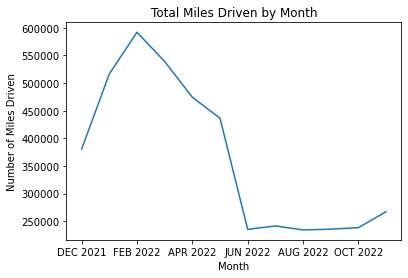

In [2]:
months = ['DEC 2021', 'JAN 2022', 'FEB 2022', 'MAR 2022', 'APR 2022', 'MAY 2022', 'JUN 2022', 'JULY 2022', 'AUG 2022', 'SEP 2022', 'OCT 2022', 'NOV 2022']

for month in months:
    df[month] = pd.to_numeric(df[month], errors='coerce')



total_miles_monthly = df[months].sum()
total_miles_monthly.plot(kind='line')
plt.title("Total Miles Driven by Month")
plt.ylabel("Number of Miles Driven")
plt.xlabel("Month")
plt.show()


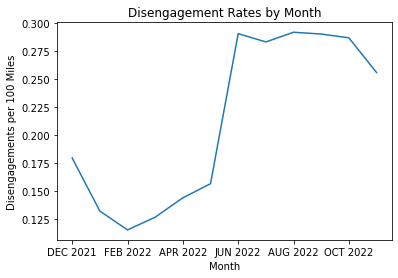

In [3]:
#Disengagement rates for each month
disengagement_rates = {}
for month in months:
    total_miles = df[month].sum()
    total_disengagements = df['Annual Total of Disengagements'].sum() / 12  # Assuming even distribution over months, which may not be accurate.
    rate = total_disengagements / total_miles * 100
    disengagement_rates[month] = rate


disengagement_series = pd.Series(disengagement_rates)
disengagement_series.plot(kind='line')
plt.title("Disengagement Rates by Month")
plt.ylabel("Disengagements per 100 Miles")
plt.xlabel("Month")
plt.show()


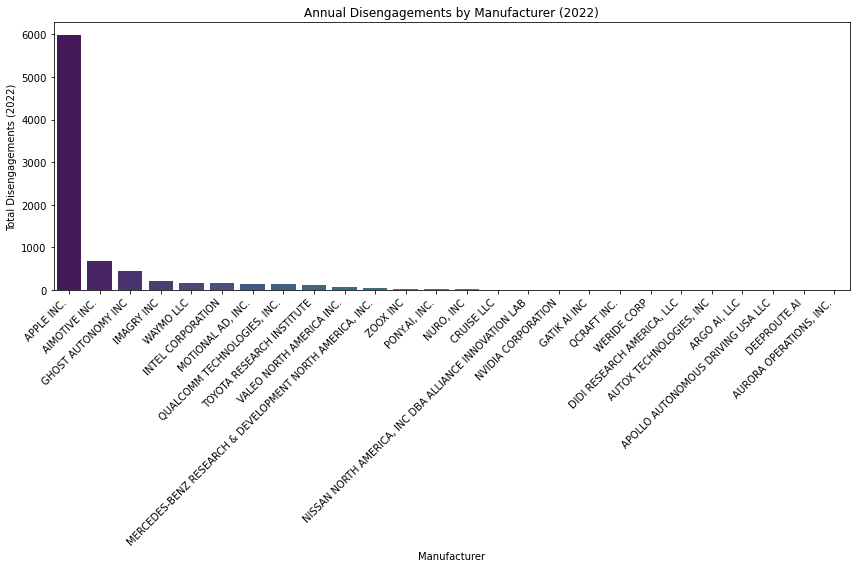

In [4]:
#Sum the annual disengagements for each manufacturer
manufacturer_disengagements = df.groupby('Manufacturer')['Annual Total of Disengagements'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=manufacturer_disengagements.index, y=manufacturer_disengagements.values, palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Disengagements (2022)")
plt.xlabel("Manufacturer")
plt.title("Annual Disengagements by Manufacturer (2022)")
plt.tight_layout()
plt.show()

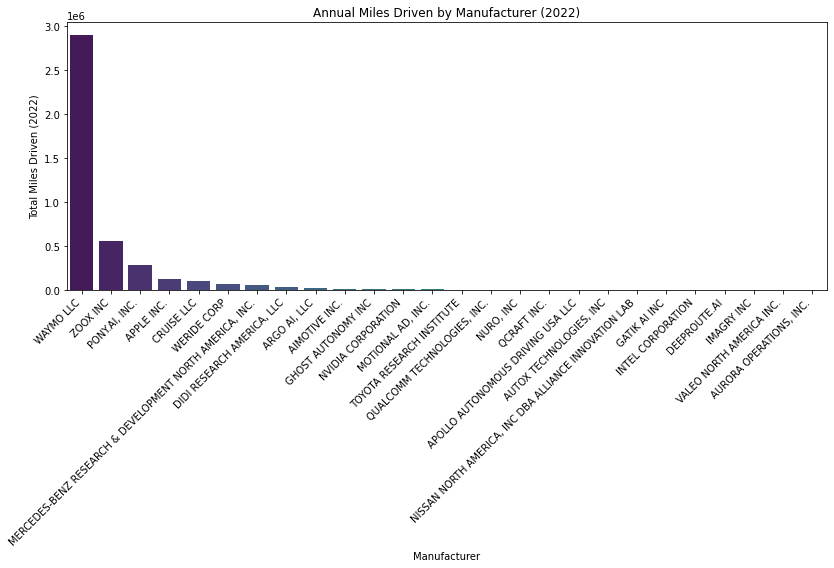

In [5]:

df['ANNUAL TOTAL'] = pd.to_numeric(df['ANNUAL TOTAL'], errors='coerce')


df = df.dropna(subset=['ANNUAL TOTAL'])

#Sum the annual miles for each manufacturer
manufacturer_miles = df.groupby('Manufacturer')['ANNUAL TOTAL'].sum().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=manufacturer_miles.index, y=manufacturer_miles.values, palette='viridis')
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Miles Driven (2022)")
plt.xlabel("Manufacturer")
plt.title("Annual Miles Driven by Manufacturer (2022)")
plt.tight_layout()
plt.show()


In [6]:

df['ANNUAL TOTAL'] = pd.to_numeric(df['ANNUAL TOTAL'], errors='coerce')
df['Annual Total of Disengagements'] = pd.to_numeric(df['Annual Total of Disengagements'], errors='coerce')


df['Miles_per_Disengagement'] = df['ANNUAL TOTAL'] / df['Annual Total of Disengagements']


print(df[['Manufacturer', 'Miles_per_Disengagement']])


                           Manufacturer  Miles_per_Disengagement
0                         AIMOTIVE INC.                20.238095
1                         AIMOTIVE INC.                26.903670
2     APOLLO AUTONOMOUS DRIVING USA LLC                      inf
3     APOLLO AUTONOMOUS DRIVING USA LLC                      inf
4     APOLLO AUTONOMOUS DRIVING USA LLC                      inf
...                                 ...                      ...
1548                           ZOOX INC                      NaN
1549                           ZOOX INC                      NaN
1550                           ZOOX INC                      NaN
1551                           ZOOX INC                      NaN
1552                           ZOOX INC                      NaN

[1437 rows x 2 columns]


In [7]:

print(df[['Manufacturer', 'ANNUAL TOTAL', 'Annual Total of Disengagements']].head())

df['Miles_per_Disengagement'] = df['ANNUAL TOTAL'] / df['Annual Total of Disengagements']
print(df[['Manufacturer', 'Miles_per_Disengagement']].head())


                        Manufacturer  ANNUAL TOTAL  \
0                      AIMOTIVE INC.        9350.0   
1                      AIMOTIVE INC.        5865.0   
2  APOLLO AUTONOMOUS DRIVING USA LLC        1142.1   
3  APOLLO AUTONOMOUS DRIVING USA LLC         824.4   
4  APOLLO AUTONOMOUS DRIVING USA LLC         141.6   

   Annual Total of Disengagements  
0                             462  
1                             218  
2                               0  
3                               0  
4                               0  
                        Manufacturer  Miles_per_Disengagement
0                      AIMOTIVE INC.                20.238095
1                      AIMOTIVE INC.                26.903670
2  APOLLO AUTONOMOUS DRIVING USA LLC                      inf
3  APOLLO AUTONOMOUS DRIVING USA LLC                      inf
4  APOLLO AUTONOMOUS DRIVING USA LLC                      inf


In [8]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm, beta


df['ANNUAL TOTAL'] = pd.to_numeric(df['ANNUAL TOTAL'], errors='coerce')
df['Annual Total of Disengagements'] = pd.to_numeric(df['Annual Total of Disengagements'], errors='coerce')

#Calculate Miles_per_Disengagement
df['Miles_per_Disengagement'] = df['ANNUAL TOTAL'] / df['Annual Total of Disengagements']


max_value = df[df['Miles_per_Disengagement'] != np.inf]['Miles_per_Disengagement'].max()
df['Miles_per_Disengagement'] = df['Miles_per_Disengagement'].replace(np.inf, max_value * 1.1)

#Normal Distribution parameters
normal_mean = df['Miles_per_Disengagement'].mean()
normal_std = df['Miles_per_Disengagement'].std()

#Lognormal Distribution parameters
log_data = np.log(df['Miles_per_Disengagement'])
lognormal_mean = log_data.mean()
lognormal_std = log_data.std()

#Exponential Distribution parameter
exponential_lambda = 1 / df['Miles_per_Disengagement'].mean()


normalized_data = (df['Miles_per_Disengagement'] - df['Miles_per_Disengagement'].min()) / (df['Miles_per_Disengagement'].max() - df['Miles_per_Disengagement'].min())
data_mean = normalized_data.mean()
data_var = normalized_data.var()
alpha_beta = data_mean * ((data_mean * (1 - data_mean) / data_var) - 1)
beta_beta = (1 - data_mean) * ((data_mean * (1 - data_mean) / data_var) - 1)

print("Normal Distribution: µ =", normal_mean, ", σ =", normal_std)
print("Lognormal Distribution: µ =", lognormal_mean, ", σ =", lognormal_std)
print("Exponential Distribution: λ =", exponential_lambda)
print("Beta Distribution: α =", alpha_beta, ", β =", beta_beta)


Normal Distribution: µ = 20339.27152809241 , σ = 8652.46931601744
Lognormal Distribution: µ = 9.438455526600999 , σ = 1.751507599755338
Exponential Distribution: λ = 4.916596932288403e-05
Beta Distribution: α = 0.212376103617787 , β = 0.04846208664267874


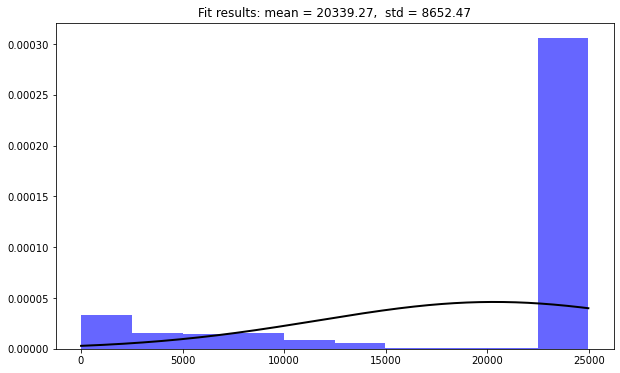

/var/folders/58/kt039m897wz90r1kwnv2rn3h0000gn/T/ipykernel_31062/3694695806.py:30: RuntimeWarning: overflow encountered in exp
  plt.plot(x, lognorm.pdf(x, df['Miles_per_Disengagement'].std(), scale=np.exp(df['Miles_per_Disengagement'].mean())), 'k', linewidth=2)


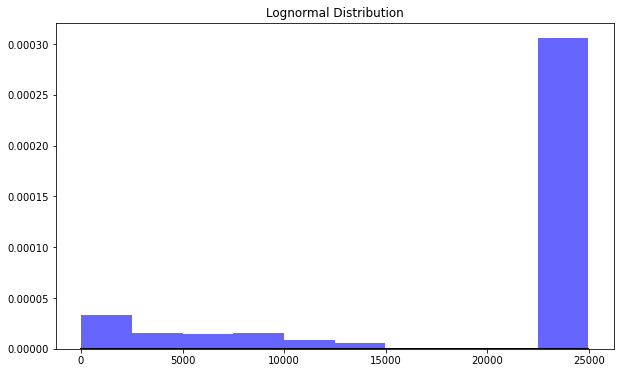

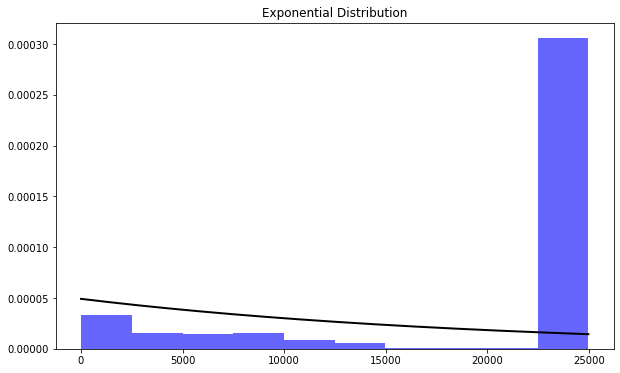

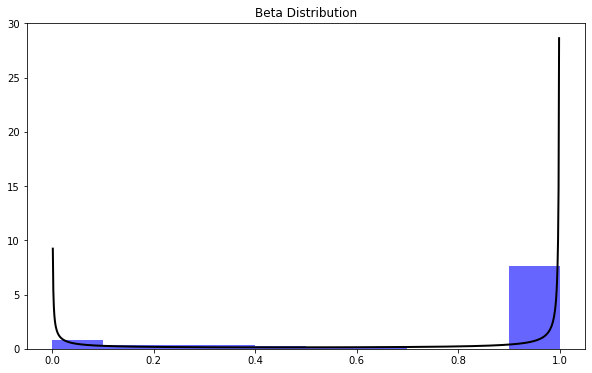

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, beta


df['ANNUAL TOTAL'] = pd.to_numeric(df['ANNUAL TOTAL'], errors='coerce')
df['Annual Total of Disengagements'] = pd.to_numeric(df['Annual Total of Disengagements'], errors='coerce')

#Calculate Miles_per_Disengagement
df['Miles_per_Disengagement'] = df['ANNUAL TOTAL'] / df['Annual Total of Disengagements']


max_value = df[df['Miles_per_Disengagement'] != np.inf]['Miles_per_Disengagement'].max()
df['Miles_per_Disengagement'] = df['Miles_per_Disengagement'].replace(np.inf, max_value * 1.1)

x = np.linspace(min(df['Miles_per_Disengagement']), max(df['Miles_per_Disengagement']), 1000)

#Normal Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Miles_per_Disengagement'], bins=10, density=True, alpha=0.6, color='b')
plt.plot(x, norm.pdf(x, df['Miles_per_Disengagement'].mean(), df['Miles_per_Disengagement'].std()), 'k', linewidth=2)
title = "Fit results: mean = %.2f,  std = %.2f" % (df['Miles_per_Disengagement'].mean(), df['Miles_per_Disengagement'].std())
plt.title(title)
plt.show()

#Lognormal Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Miles_per_Disengagement'], bins=10, density=True, alpha=0.6, color='b')
plt.plot(x, lognorm.pdf(x, df['Miles_per_Disengagement'].std(), scale=np.exp(df['Miles_per_Disengagement'].mean())), 'k', linewidth=2)
plt.title("Lognormal Distribution")
plt.show()

#Exponential Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Miles_per_Disengagement'], bins=10, density=True, alpha=0.6, color='b')
plt.plot(x, expon.pdf(x, scale=df['Miles_per_Disengagement'].mean()), 'k', linewidth=2)
plt.title("Exponential Distribution")
plt.show()

#Beta Distribution
normalized_data = (df['Miles_per_Disengagement'] - df['Miles_per_Disengagement'].min()) / (df['Miles_per_Disengagement'].max() - df['Miles_per_Disengagement'].min())
data_mean = normalized_data.mean()
data_var = normalized_data.var()
alpha_beta = data_mean * ((data_mean * (1 - data_mean) / data_var) - 1)
beta_beta = (1 - data_mean) * ((data_mean * (1 - data_mean) / data_var) - 1)

x_normalized = np.linspace(0, 1, 1000)
plt.figure(figsize=(10, 6))
plt.hist(normalized_data, bins=10, density=True, alpha=0.6, color='b')
plt.plot(x_normalized, beta.pdf(x_normalized, alpha_beta, beta_beta), 'k', linewidth=2)
plt.title("Beta Distribution")
plt.show()


In [10]:
df['ANNUAL TOTAL'] = pd.to_numeric(df['ANNUAL TOTAL'], errors='coerce')
df['Annual Total of Disengagements'] = pd.to_numeric(df['Annual Total of Disengagements'], errors='coerce')
print(df['Annual Total of Disengagements'])

0       462
1       218
2         0
3         0
4         0
       ... 
1548      0
1549      0
1550      0
1551      0
1552      0
Name: Annual Total of Disengagements, Length: 1437, dtype: int64


In [11]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm, beta

df['ANNUAL TOTAL'] = pd.to_numeric(df['ANNUAL TOTAL'], errors='coerce')
df['Annual Total of Disengagements'] = pd.to_numeric(df['Annual Total of Disengagements'], errors='coerce')

df_filtered = df[~df['Manufacturer'].isin(['WAYMO LLC', 'CRUISE LLC'])]

df_filtered['Miles_per_Disengagement'] = df_filtered['ANNUAL TOTAL'] / df_filtered['Annual Total of Disengagements']

max_noninf_value = df_filtered[df_filtered['Miles_per_Disengagement'] != np.inf]['Miles_per_Disengagement'].max()
df_filtered['Miles_per_Disengagement'].replace(np.inf, max_noninf_value * 1.1, inplace=True)

#Normal Distribution parameters
normal_mean = df_filtered['Miles_per_Disengagement'].mean()
normal_std = df_filtered['Miles_per_Disengagement'].std()

#Lognormal Distribution parameters
log_data = np.log(df_filtered['Miles_per_Disengagement'].dropna())  # Drop NaN values resulting from log(0)
lognormal_mean = log_data.mean()
lognormal_std = log_data.std()

#Exponential Distribution parameters
exponential_lambda = 1 / df_filtered['Miles_per_Disengagement'].mean()

#Beta Distribution parameters 
normalized_data = (df_filtered['Miles_per_Disengagement'] - df_filtered['Miles_per_Disengagement'].min()) / (df_filtered['Miles_per_Disengagement'].max() - df_filtered['Miles_per_Disengagement'].min())
data_mean = normalized_data.mean()
data_var = normalized_data.var()
alpha_beta = data_mean * ((data_mean * (1 - data_mean) / data_var) - 1)
beta_beta = (1 - data_mean) * ((data_mean * (1 - data_mean) / data_var) - 1)

print("Normal Distribution: µ =", normal_mean, ", σ =", normal_std)
print("Lognormal Distribution: µ =", lognormal_mean, ", σ =", lognormal_std)
print("Exponential Distribution: λ =", exponential_lambda)
print("Beta Distribution: α =", alpha_beta, ", β =", beta_beta)


Normal Distribution: µ = 9855.841218604535 , σ = 5835.865323944728
Lognormal Distribution: µ = 8.13830469528598 , σ = 2.480663994527137
Exponential Distribution: λ = 0.00010146267353742815
Beta Distribution: α = 0.11589477324807883 , β = 0.04726998868832212


/var/folders/58/kt039m897wz90r1kwnv2rn3h0000gn/T/ipykernel_31062/2648225547.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Miles_per_Disengagement'] = df_filtered['ANNUAL TOTAL'] / df_filtered['Annual Total of Disengagements']
/Users/nikizakarian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [12]:
from scipy.stats import kstest

df_filtered = df_filtered.dropna(subset=['Miles_per_Disengagement'])
df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan).dropna(subset=['Miles_per_Disengagement'])

normal_mean = df_filtered['Miles_per_Disengagement'].mean()
normal_std = df_filtered['Miles_per_Disengagement'].std()

shape, loc, scale = lognorm.fit(df_filtered['Miles_per_Disengagement'], floc=0)

lambda_exp = 1 / df_filtered['Miles_per_Disengagement'].mean()

min_value = df_filtered['Miles_per_Disengagement'].min()
max_value = df_filtered['Miles_per_Disengagement'].max()

if min_value == 0:
    min_value = df_filtered[df_filtered['Miles_per_Disengagement'] > 0]['Miles_per_Disengagement'].min()

normalized_data = (df_filtered['Miles_per_Disengagement'] - min_value) / (max_value - min_value)
normalized_data = np.clip(normalized_data, a_min=1e-4, a_max=1 - 1e-4)
a, b, loc_beta, scale_beta = beta.fit(normalized_data, floc=0, fscale=1)
beta_stat, beta_p = kstest(normalized_data, 'beta', args=(a, b, loc_beta, scale_beta))


norm_stat, norm_p = kstest(df_filtered['Miles_per_Disengagement'], 'norm', args=(normal_mean, normal_std))
lognorm_stat, lognorm_p = kstest(df_filtered['Miles_per_Disengagement'], 'lognorm', args=(shape, loc, scale))
exp_stat, exp_p = kstest(df_filtered['Miles_per_Disengagement'], 'expon', args=(loc, 1/lambda_exp))
beta_stat, beta_p = kstest(normalized_data, 'beta', args=(alpha_beta, beta_beta, loc_beta, scale_beta))

print("Normal Distribution KS Test: Statistic =", norm_stat, ", P-Value =", norm_p)
print("Lognormal Distribution KS Test: Statistic =", lognorm_stat, ", P-Value =", lognorm_p)
print("Exponential Distribution KS Test: Statistic =", exp_stat, ", P-Value =", exp_p)
print("Beta Distribution KS Test: Statistic =", beta_stat, ", P-Value =", beta_p)


Normal Distribution KS Test: Statistic = 0.3953864677526486 , P-Value = 4.878268956231309e-46
Lognormal Distribution KS Test: Statistic = 0.35485330094256623 , P-Value = 6.781857412123067e-37
Exponential Distribution KS Test: Statistic = 0.3961964027786699 , P-Value = 3.118230413193134e-46
Beta Distribution KS Test: Statistic = 0.4632978803493297 , P-Value = 5.300471115448599e-64


/var/folders/58/kt039m897wz90r1kwnv2rn3h0000gn/T/ipykernel_31062/3982601381.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Miles_per_Disengagement'] = df_filtered['ANNUAL TOTAL'] / df_filtered['Annual Total of Disengagements']


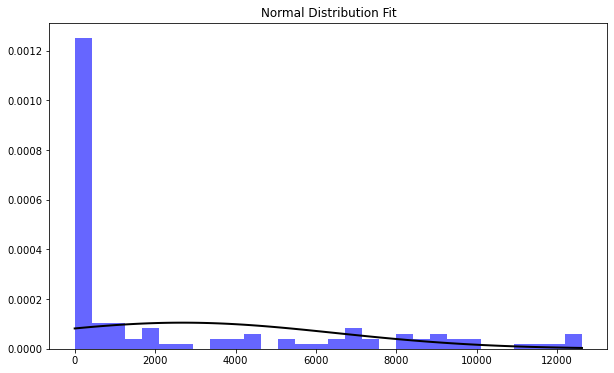

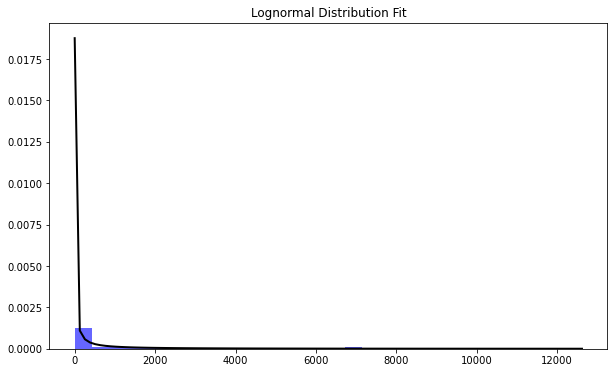

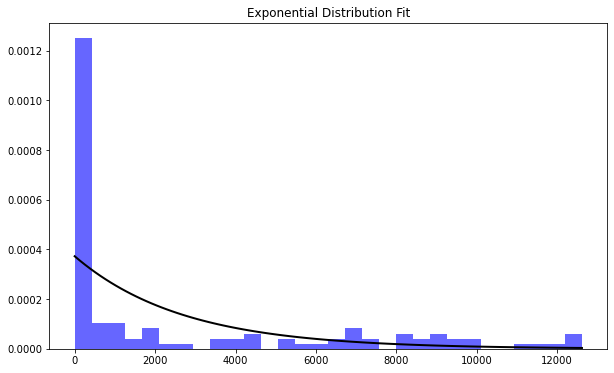

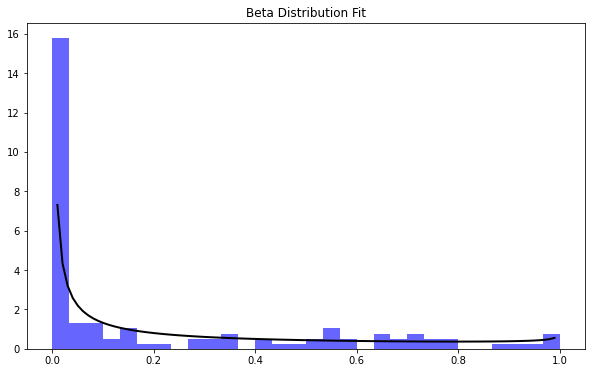

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, beta, kstest

df['ANNUAL TOTAL'] = pd.to_numeric(df['ANNUAL TOTAL'], errors='coerce')
df['Annual Total of Disengagements'] = pd.to_numeric(df['Annual Total of Disengagements'], errors='coerce')

df_filtered = df[~df['Manufacturer'].isin(['WAYMO LLC', 'CRUISE LLC'])]

df_filtered['Miles_per_Disengagement'] = df_filtered['ANNUAL TOTAL'] / df_filtered['Annual Total of Disengagements']

df_filtered = df_filtered.replace([np.inf, -np.inf], np.nan).dropna(subset=['Miles_per_Disengagement'])

#Normal Distribution parameters
normal_mean = df_filtered['Miles_per_Disengagement'].mean()
normal_std = df_filtered['Miles_per_Disengagement'].std()

#Lognormal Distribution parameters
log_data = np.log(df_filtered['Miles_per_Disengagement'].dropna())  # Drop NaN values
lognormal_mean = log_data.mean()
lognormal_std = log_data.std()

#Exponential Distribution parameter
exponential_lambda = 1 / df_filtered['Miles_per_Disengagement'].mean()

#Beta Distribution parameters
normalized_data = (df_filtered['Miles_per_Disengagement'] - df_filtered['Miles_per_Disengagement'].min()) / \
                  (df_filtered['Miles_per_Disengagement'].max() - df_filtered['Miles_per_Disengagement'].min())

normalized_data = np.clip(normalized_data, a_min=1e-4, a_max=1 - 1e-4)


alpha_beta, beta_beta, loc_beta, scale_beta = beta.fit(normalized_data, floc=0, fscale=1)
beta_stat, beta_p = kstest(normalized_data, 'beta', args=(alpha_beta, beta_beta, loc_beta, scale_beta))
#print("Beta Distribution KS Test: Statistic =", beta_stat, ", P-Value =", beta_p)

x_range = np.linspace(df_filtered['Miles_per_Disengagement'].min(), df_filtered['Miles_per_Disengagement'].max(), 100)

#Plot for Normal Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Miles_per_Disengagement'], bins=30, density=True, alpha=0.6, color='b')
plt.plot(x_range, norm.pdf(x_range, normal_mean, normal_std), 'k', linewidth=2)
plt.title('Normal Distribution Fit')
plt.show()

#Plot for Lognormal Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Miles_per_Disengagement'], bins=30, density=True, alpha=0.6, color='b')
plt.plot(x_range, lognorm.pdf(x_range, s=lognormal_std, scale=np.exp(lognormal_mean)), 'k', linewidth=2)
plt.title('Lognormal Distribution Fit')
plt.show()

#Plot for Exponential Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Miles_per_Disengagement'], bins=30, density=True, alpha=0.6, color='b')
plt.plot(x_range, expon.pdf(x_range, scale=1/exponential_lambda), 'k', linewidth=2)
plt.title('Exponential Distribution Fit')
plt.show()

#Plot for Beta Distribution
x_normalized_range = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))
plt.hist(normalized_data, bins=30, density=True, alpha=0.6, color='b')
plt.plot(x_normalized_range, beta.pdf(x_normalized_range,alpha_beta, beta_beta), 'k', linewidth=2)
plt.title('Beta Distribution Fit')
plt.show()




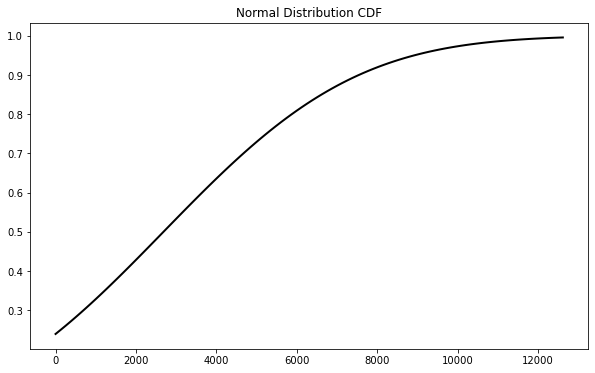

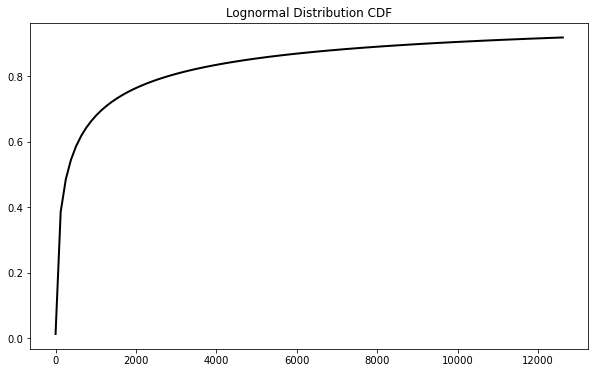

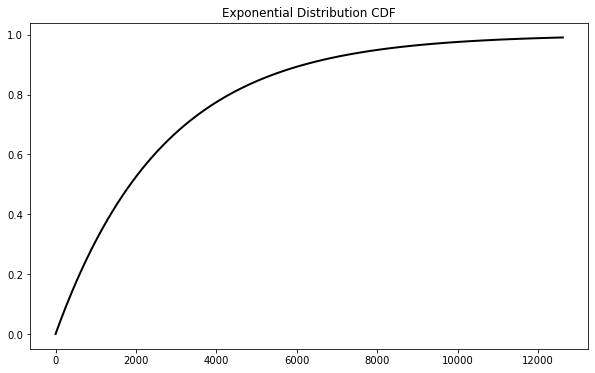

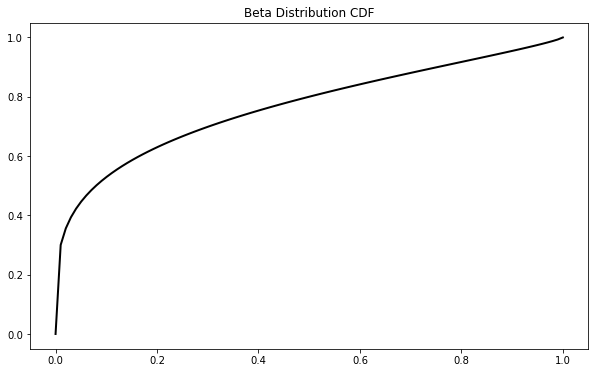

In [14]:
#Plot for Normal Distribution CDF
plt.figure(figsize=(10, 6))
plt.plot(x_range, norm.cdf(x_range, normal_mean, normal_std), 'k', linewidth=2)
plt.title('Normal Distribution CDF')
plt.show()

#Plot for Lognormal Distribution CDF
plt.figure(figsize=(10, 6))
plt.plot(x_range, lognorm.cdf(x_range, s=lognormal_std, scale=np.exp(lognormal_mean)), 'k', linewidth=2)
plt.title('Lognormal Distribution CDF')
plt.show()

#Plot for Exponential Distribution CDF
plt.figure(figsize=(10, 6))
plt.plot(x_range, expon.cdf(x_range, scale=1/exponential_lambda), 'k', linewidth=2)
plt.title('Exponential Distribution CDF')
plt.show()

#Plot for Beta Distribution CDF
plt.figure(figsize=(10, 6))
plt.plot(x_normalized_range, beta.cdf(x_normalized_range, alpha_beta, beta_beta), 'k', linewidth=2)
plt.title('Beta Distribution CDF')
plt.show()


In [17]:
import numpy as np
import pandas as pd
from scipy.stats import nbinom

df_filtered['Count_Data'] = df_filtered['Miles_per_Disengagement'].apply(lambda x: round(x))

r = 1  
p = df_filtered['Count_Data'].mean() / (df_filtered['Count_Data'].mean() + r)

mean, var = nbinom.stats(r, p, moments='mv')

print("Negative Binomial Distribution:")
print("Estimated 'r' (number of successes):", r)
print("Estimated 'p' (probability of success):", p)
print("Estimated mean:", mean)
print("Estimated variance:", var)


Negative Binomial Distribution:
Estimated 'r' (number of successes): 1
Estimated 'p' (probability of success): 0.9996274026107513
Estimated mean: 0.00037273626980967274
Estimated variance: 0.00037287520213650436
